In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from matplotlib.pyplot import figure

Dados derivados da curva de rotação.

- 'xdata' mostra a distância radial, em kpc.

- 'ydata' mostra a velocidade, em km/s.

In [17]:
xdata = np.array([ 0.42177325,  1.687093  ,  2.95241274,  4.21773249,  5.48305224,
        6.74837198,  8.01369173,  9.27901148, 10.54433122, 11.80965097,
       13.07497072, 14.34029047, 15.60561021, 16.87092996])

ydata = np.array([ 23.86581126,  67.62279448,  95.18766195, 114.03856544,
       147.26618564, 157.14551751, 157.12790643, 162.75567989,
       165.34414476, 167.18881464, 160.2902497 , 160.65923225,
       168.21365823, 164.63545048])

In [18]:
#G = 6.67408*10**(-11) #constante gravitacional, em m³/kg.s²
R = xdata * 3.08e+21
vc = ydata * 1e+5

Definindo a função Python a partir da equação 8.16, de Dynamics and Astrophysics of Galaxies, disponível em:
http://astro.utoronto.ca/~bovy/AST1420/notes/notebooks/07.-Flattened-Mass-Distributions.html#Some-general-considerations#


In [19]:
def func(R,M,a):
    G = 6.67e-8
    return np.sqrt((G*M*(R**2))/(R**2+a**2)**(3/2))

In [23]:
popt, pcov = curve_fit(func, R, vc, p0=[1e11*2e33, 10e21])
M,a = popt
print('Mass (log (M_sun)): ',np.log10(M/2e33))
print('a (kpc): ',a/3.08e21)

Mass (log (M_sun)):  11.108929819712303
a (kpc):  7.629232799238224


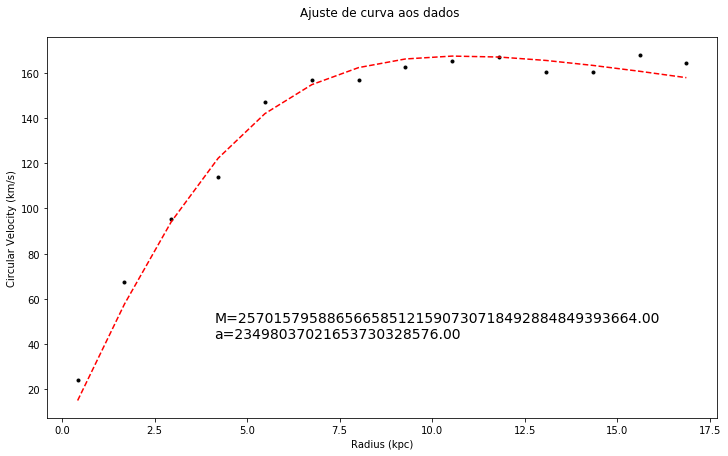

In [24]:
fig, ax = plt.subplots()
plt.plot(xdata,ydata,'k.',label='Dados')
plt.plot(xdata, func(R, *popt)/1e5,'r--')
textstr = 'M=%.2f\na=%.2f\n'% tuple(popt)
ax.text(0.25, 0.28, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')
plt.gcf().set_size_inches(12, 7)
plt.title('Ajuste de curva aos dados \n')
plt.xlabel("Radius (kpc)")
plt.ylabel('Circular Velocity (km/s)')
plt.show()

In [22]:
massa_solar = 1.989 * 10**(30) #em kg

x = log_mass = np.log10(2.77328*10**(41) / massa_solar)
print(x)

11.14435893654936
